# CHEM452 - Lasso and Ridge Regression Example Using Sklearn

In [ ]:
import numpy as np #Import numpy library
import pandas as pd #Import pandas library
import matplotlib.pyplot as plt #Import matplotlib plotting library
from sklearn.linear_model import LinearRegression #Import linear regression
from sklearn.linear_model import Lasso #Import lasso regression
from sklearn.linear_model import Ridge #Import Ridge regression
from sklearn.preprocessing import StandardScaler #Import standard scaler function

Let's first read in some data to analyze. We are going to use the OPV dataset available on the course website.

In [ ]:
df = pd.read_csv("OPV_data_example.csv") #Read in datafile
#Next I'm going to rename some of the columns to have more concise names for convenience
df = df.rename(columns={'Voc (V)': 'Voc', 'Jsc (mA cm^2)': 'Jsc', 'Mw (kg mol^-1)': 'Mw', 'Mn (kg mol^-1)': 'Mn', 'PDI (=Mw/Mn)': 'PDI', 'Monomer (g mol^-1)': 'Monomer_MW', '-HOMO (eV)': 'E_HOMO', '-LUMO (eV)': 'E_LUMO', 'bandgap(eV)': 'bandgap'}) # just changing column names so there's no spaces and such that make referring to them in code difficult
df.head()

,ID No.,Nickname,PCE,Voc,Jsc,FF,Mw,Mn,PDI,Monomer_MW,E_HOMO,E_LUMO,bandgap,SMILES
0,1,PBTTT-C14,2.34,0.53,9.37,0.48,46.2,22.0,2.10,724,5.10,3.10,1.88,CC1=CC(CCCCCCCCCCCCCC)=C(C2=CC3=C(S2)C=C(C4=C(...
1,2,PCDTBT,3.60,0.89,6.92,0.63,73.0,37.0,1.97,731,5.50,3.60,1.88,CC1=CC(N(C(CCCCCCCC)CCCCCCCC)C2=C3C=CC(C4=CC=C...
2,3,PCPDTBT,5.12,0.61,15.73,0.53,47.6,26.6,1.79,564,5.30,3.55,1.43,CC1=CC(C(CC(CCCC)CC)(CC(CCCC)CC)C2=C3SC(C4=CC=...
3,4,PffBT4T-2OD,10.20,0.77,18.40,0.74,93.7,47.5,1.97,1089,5.34,3.69,1.65,CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=C(F)C(F)=C...
4,5,PffBT4T-2OD,10.00,0.77,18.20,0.74,52.9,28.2,1.88,1089,5.20,3.57,1.63,CC1=C(CC(CCCCCCCC)CCCCCCCCCC)C=C(C2=CC=C(C3=CC...


Let's say we are interested in determining the correlation between bandgap energy and open circuit voltage. First, let's plot to see if we can visually identify any correlation.

Text(0, 0.5, 'Voc (V)')

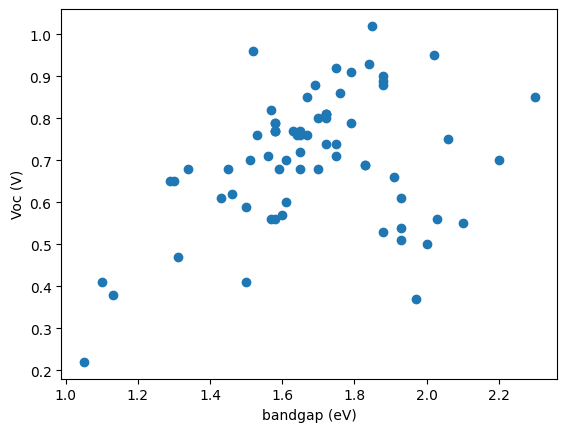

In [ ]:
#technically .values is redundant, but I like to do it to make sure I don't also include
#the column title in some other application

V_list = np.array(df[['Voc']].values) # make array for the dependent variable - open circuit voltage
gap_list = np.array(df[['bandgap']].values) # make array for the independent variable - bandgap
plt.plot(gap_list, V_list, 'o') # visualize the data, notice there is a rough correlation
plt.xlabel('bandgap (eV)') #label axes
plt.ylabel('Voc (V)')

Since it appears that there is a vague upward trend to the data, let's try fitting a linear model to the data.

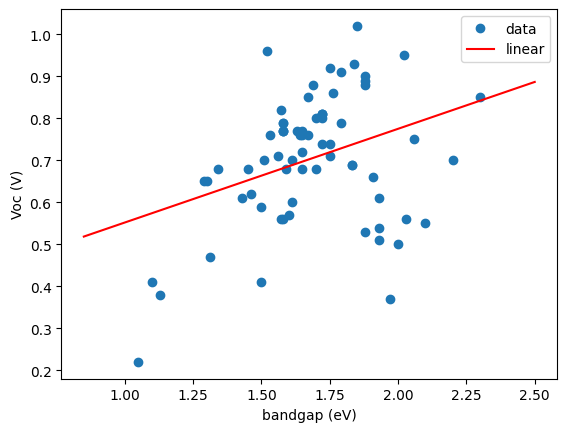

In [ ]:
#This is a standard packaging of a regression routine with a standard scaler
#Note how the forward and reverse transformations are applied in
N = len(gap_list)
xlow = min(gap_list)-0.2
xhigh = max(gap_list)+0.2


lin_reg = LinearRegression() #Instantiate the scikit-learn linear regression object that will be used for fitting

V_scaler = StandardScaler() #Define a standard scaler object for voltages
gap_scaler = StandardScaler() #Define a standard scaler object for band gaps

V_std = V_scaler.fit_transform(V_list) #Fit and transform the V data (subtract mean, divide by std)
gap_std = gap_scaler.fit_transform(gap_list) #Fit and transform the band gap data (subtract mean, divide by std)

lin_reg.fit(gap_std,V_std) #Fit the linear regression model to my data

gap_predict_std = gap_scaler.transform(np.linspace(xlow,xhigh,N).reshape(-1,1)) #Create a vector over the space of band gaps, and standardize it
V_predict_std = lin_reg.predict(gap_predict_std) #compute the voltages from the fit model above
V_predict = V_scaler.inverse_transform(V_predict_std) #Inverse transform the predicted V values back to normal scale
gap_predict = gap_scaler.inverse_transform(gap_predict_std) #Inverse transform the predicted gap values back to normal scale

plt.plot(gap_list, V_list, 'o') #Plot the data sets against each other
plt.plot(gap_predict,V_predict, 'r-') #Plot the linear regression fit to the data

plt.xlabel('bandgap (eV)')
plt.ylabel('Voc (V)')
plt.legend(['data', 'linear'])


Since this data is pretty noisy we think it might be a good idea to fit a regularized model instead. We choose the LASSO regression technique in Sklearn with a small (0.005) regularization coefficient.

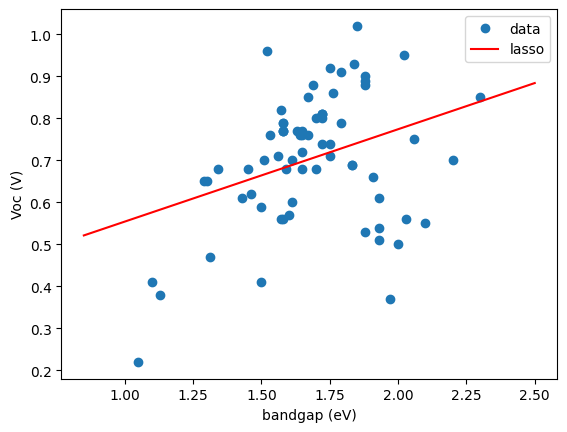

In [ ]:
#Same code as above, except we substitute in a lasso regression for linear regression

lass_reg = Lasso(alpha=0.005) #Instantiate the scikit-learn lasso regression object that will be used for fitting

V_scaler = StandardScaler() #Define a standard scaler object for voltages
gap_scaler = StandardScaler() #Define a standard scaler object for band gaps

V_std = V_scaler.fit_transform(V_list) #Fit and transform the V data (subtract mean, divide by std)
gap_std = gap_scaler.fit_transform(gap_list) #Fit and transform the band gap data (subtract mean, divide by std)

lass_reg.fit(gap_std,V_std) #Fit the lasso regression model to my data

gap_predict_std = gap_scaler.transform(np.linspace(xlow,xhigh,N).reshape(-1,1)) #Create a vector over the space of band gaps, and standardize it
V_predict_std = lass_reg.predict(gap_predict_std).reshape(-1,1) #compute the voltages from the fit model above
V_predict = V_scaler.inverse_transform(V_predict_std) #Inverse transform the predicted V values back to normal scale
gap_predict = gap_scaler.inverse_transform(gap_predict_std) #Inverse transform the predicted gap values back to normal scale

plt.plot(gap_list, V_list, 'o') #Plot the data sets against each other
plt.plot(gap_predict,V_predict, 'r-') #Plot the lasso regression fit to the data

plt.xlabel('bandgap (eV)')
plt.ylabel('Voc (V)')
plt.legend(['data', 'lasso'])


We can do something similar for Ridge Regression. Notice that the magnitude of regularization (alpha value) as well as the style of regularization (L1/Lasso or L2/Ridge) both strongly influence the nature of the optimal fit.

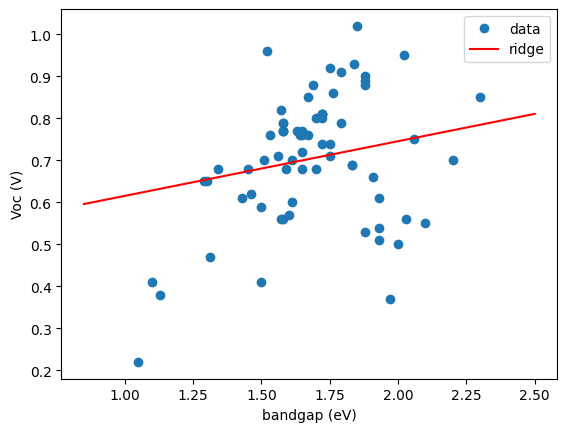

In [ ]:
#Same code as above, except we substitute in a ridge regression for linear regression

ridge_reg = Ridge(alpha=50.0) #Instantiate the scikit-learn lasso regression object that will be used for fitting

V_scaler = StandardScaler() #Define a standard scaler object for voltages
gap_scaler = StandardScaler() #Define a standard scaler object for band gaps

V_std = V_scaler.fit_transform(V_list) #Fit and transform the V data (subtract mean, divide by std)
gap_std = gap_scaler.fit_transform(gap_list) #Fit and transform the band gap data (subtract mean, divide by std)

ridge_reg.fit(gap_std,V_std) #Fit the lasso regression model to my data

gap_predict_std = gap_scaler.transform(np.linspace(xlow,xhigh,N).reshape(-1,1)) #Create a vector over the space of band gaps, and standardize it
V_predict_std = ridge_reg.predict(gap_predict_std).reshape(-1,1) #compute the voltages from the fit model above
V_predict = V_scaler.inverse_transform(V_predict_std) #Inverse transform the predicted V values back to normal scale
gap_predict = gap_scaler.inverse_transform(gap_predict_std) #Inverse transform the predicted gap values back to normal scale

plt.plot(gap_list, V_list, 'o') #Plot the data sets against each other
plt.plot(gap_predict,V_predict, 'r-') #Plot the lasso regression fit to the data

plt.xlabel('bandgap (eV)')
plt.ylabel('Voc (V)')
plt.legend(['data', 'ridge'])

Alpha (the regularization strength) is typically determined based off of splitting your data into train and test sets. For now, we will illustrate the sensitivity of the regression on alpha. I will use lasso regression as an illustrative example, but feel free to do the same with ridge regression

Lasso coefficient:  [0.33389205]
Lasso coefficient:  [0.24389205]
Lasso coefficient:  [0.14389205]
Lasso coefficient:  [0.04389205]


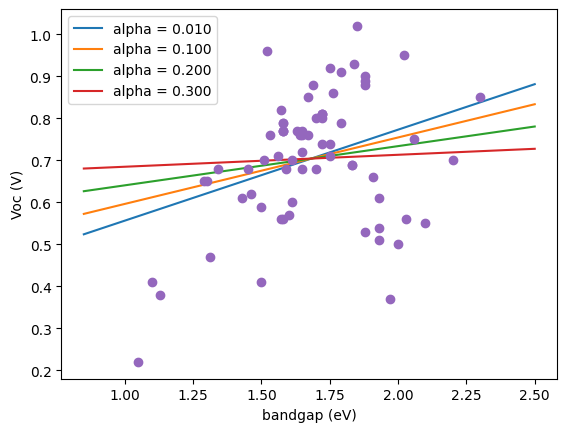

In [ ]:
#Same code as above Lasso, except we add a for loop over different regularization
#parameter (alpha) values.

V_scaler = StandardScaler() #Define a standard scaler object for voltages
gap_scaler = StandardScaler() #Define a standard scaler object for band gaps

V_std = V_scaler.fit_transform(V_list) #Fit and transform the V data (subtract mean, divide by std)
gap_std = gap_scaler.fit_transform(gap_list) #Fit and transform the band gap data (subtract mean, divide by std)

alpha_vals = [0.01,0.1,0.2,0.3] #Define the different values of the regularization parameter we will try

#A lot of these transforms can be taken outside of the for loop for effiency
#But I am keeping them inside the loop for simplicity right now
for a in alpha_vals:
  lass_reg = Lasso(alpha=a) #Set Lasso regression parameter to each iterated element of alpha_vals
  lass_reg.fit(gap_std,V_std) #Fit the lasso regression model to my data
  gap_predict_std = gap_scaler.transform(np.linspace(xlow,xhigh,N).reshape(-1,1)) #Create a vector over the space of band gaps, and standardize it
  V_predict_std = lass_reg.predict(gap_predict_std).reshape(-1,1) #compute the voltages from the fit model above
  V_predict = V_scaler.inverse_transform(V_predict_std) #Inverse transform the predicted V values back to normal scale
  gap_predict = gap_scaler.inverse_transform(gap_predict_std) #Inverse transform the predicted gap values back to normal scale
  plt.plot(gap_predict,V_predict, '-', label='alpha = %.3f' % a)
  print('Lasso coefficient: ',lass_reg.coef_)

plt.plot(gap_list, V_list, 'o')
plt.xlabel('bandgap (eV)')
plt.ylabel('Voc (V)')
plt.legend()

Notice here that once alpha reaches a sufficiently high value, the coefficient for the slope approaches zero. This is expected for lasso regression! Can you figure out why that might be?

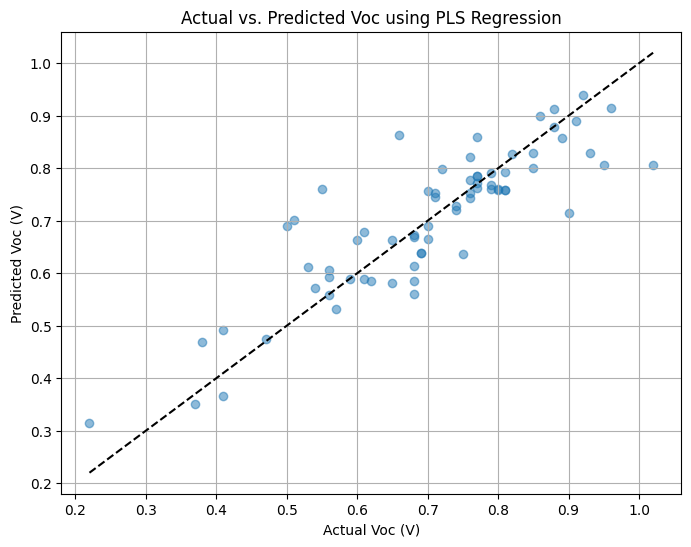

In [ ]:
# prompt: Use partial least squares to fit the Voc using all of the columns except for the nickname, id number, Jsc, and smiles. plot the result

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

# Drop columns that are not predictors or the target
X = df.drop(columns=['Voc', 'Nickname', 'ID No.', 'Jsc', 'SMILES'])
y = df['Voc']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the PLS regression model
pls = PLSRegression(n_components=2)  # You can tune n_components
pls.fit(X_scaled, y)

# Predict Voc using the PLS model
y_pred = pls.predict(X_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual Voc (V)")
plt.ylabel("Predicted Voc (V)")
plt.title("Actual vs. Predicted Voc using PLS Regression")
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') # Add a diagonal line for reference
plt.grid(True)
plt.show()